1. MSSV: 19522351
2. Họ tên: Trần Trung Tín
3. Bài tập: 1

#Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import os
dir_monhoc = '/content/drive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap1')
dir_images = os.path.join(dir_baitap, 'images')

#Khai báo thư viện

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from scipy.spatial import distance
import numpy as np

#Yêu cầu 1: Đọc ảnh và hiện thị histogram

##Đọc ảnh

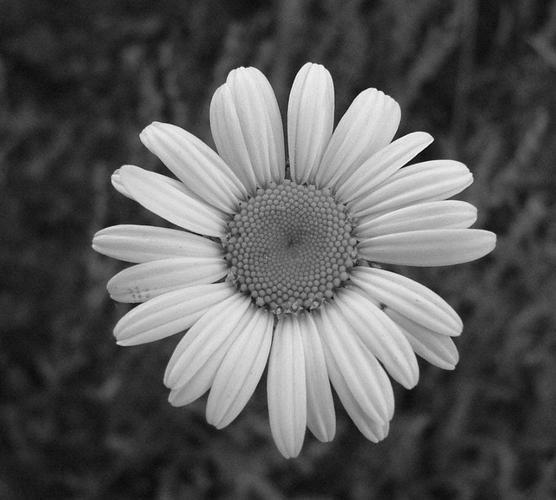

In [ ]:
path_filename = os.path.join(dir_images, 'image_0814.jpg')
img = cv.imread(path_filename, 0)
cv2_imshow(img)

##Tính và hiện thị histogram

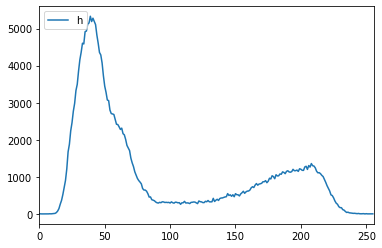

In [ ]:
hist = cv.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

##Hàm tính histogram

In [ ]:
def TinhHist(pathfilename):
  img = cv.imread(pathfilename, 0)
  hist = cv.calcHist([img], [0], None, [256], [0, 256])
  size = img.shape[0]*img.shape[1]
  hist = hist / size
  return hist

#Yêu cầu 2

##Đọc 2 ảnh

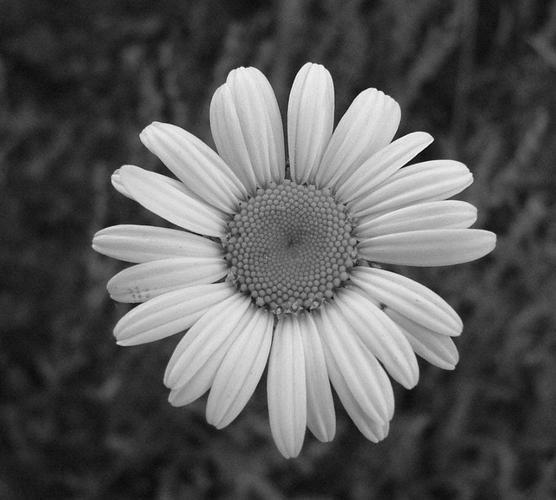

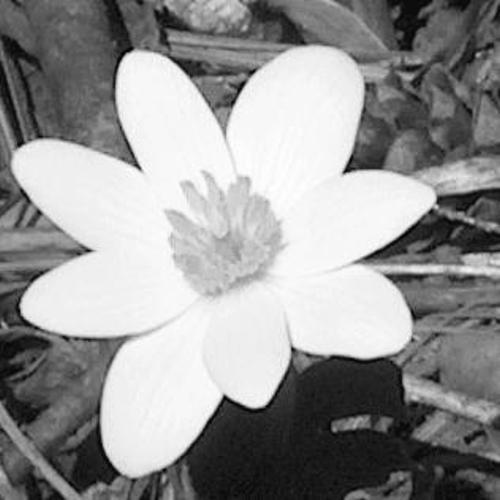

In [ ]:
img_0814 = os.path.join(dir_images, 'image_0814.jpg')
img_0816 = os.path.join(dir_images, 'image_0816.jpg')
img_1248 = os.path.join(dir_images, 'image_1248.jpg')
im1 = cv.imread(img_0814, 0)
im2 = cv.imread(img_1248, 0)
im3 = cv.imread(img_0816, 0)
cv2_imshow(im1)
cv2_imshow(im2)

##Tính khoảng cách

In [ ]:
hist_0814 = TinhHist(img_0814)
hist_1248 = TinhHist(img_1248)
hist_0816 = TinhHist(img_0816)
distance1 = distance.euclidean(hist_0814, hist_1248)
print(f'khoảng cách giữa 2 ảnh 0814 và 1248: {distance1}')
distance2 = distance.euclidean(hist_0814, hist_0816)
print(f'Khoảng cách giữa 2 ảnh 0814 và 0816: {distance2}')

khoảng cách giữa 2 ảnh 0814 và 1248: 0.1179130091484108
Khoảng cách giữa 2 ảnh 0814 và 0816: 0.03457549676792528


##Tính sự tương đồng theo cosin

In [ ]:
1-distance.cosine(hist_0814, hist_1248)

0.32385099447245347

In [ ]:
1-distance.cosine(hist_0814, hist_0816)

0.9452094176236527

#Yêu cầu 3: Cân bằng histogram cho ảnh baby.jpg

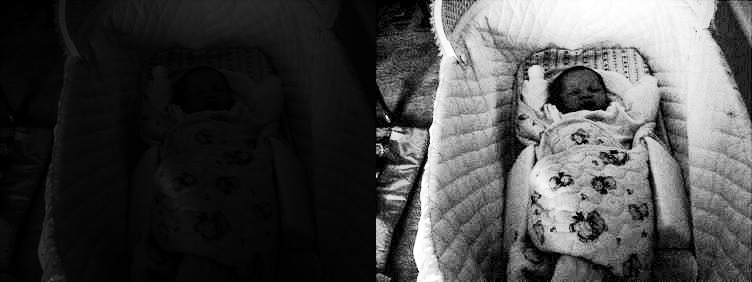

In [ ]:
img_babay = os.path.join(dir_images, 'baby.jpg')
img = cv.imread(img_babay, 0)
equ = cv.equalizeHist(img)
res = np.hstack((img, equ))
cv2_imshow(res)